In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#upload all files from the lib folder here
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving data_augmentation.py to data_augmentation.py
Saving encode_data.py to encode_data.py
Saving feature_extraction.py to feature_extraction.py
Saving preprocess_data.py to preprocess_data.py
Saving train_DL_model.py to train_DL_model.py
Saving train_ml_model.py to train_ml_model.py
Saving vectorizer.py to vectorizer.py


In [3]:
!pip install nltk
import nltk
nltk.download('all')
!pip install catboost
!pip install xgboost

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [4]:
#sys.path.append('C:/Applications/Machine Learning/NLP/CapstoneProjectNLP/lib')
import sys
sys.path.append('../')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import data_augmentation
import preprocess_data 
import train_ml_model
import train_DL_model
import encode_data
import vectorizer
import time
import feature_extraction
from data_augmentation import *
from preprocess_data import *
from train_ml_model import *
from train_DL_model import *
from encode_data import *
from vectorizer import *
from feature_extraction import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from nltk import word_tokenize, pos_tag, pos_tag_sents
from sklearn import metrics
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.initializers import Constant
from keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional,Input,GlobalMaxPool1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.models import Model
import keras.optimizers
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.initializers import Constant
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
import keras.optimizers
import tensorflow as tf
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix,classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [6]:
# accident_safety_data=pd.read_csv("C:/Applications/Machine Learning/NLP/CapstoneProjectNLP/data/hse_data.csv")
accident_safety_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/CapstoneProjectNLP/data/hse_data.csv")

In [7]:
accident_safety_data.head()

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

In [8]:
accident_safety_data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

We can see that the columns "Unnamed" is unwanted, as it will not help us in our analysis. 
Also, Data column should be renamed to "Date". Therefore, let's drop the column "Unnamed" and rename the column "Data" to "Date"

In [9]:
#create a backup of the dataset before we make any changes to it
accident_safety_data_new=accident_safety_data.copy(True)
accident_safety_data_new.head()

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

In [10]:
#dropping "Unnamed" column
accident_safety_data_new.drop('Unnamed: 0',axis='columns', inplace=True)
#renaming "Data" column to "Date"
accident_safety_data_new.rename(columns = {'Data':'Date'}, inplace = True)
#renaming "Genre" column to "Gender"
accident_safety_data_new.rename(columns = {'Genre':'Gender'}, inplace = True)
#renaming "Employee or Third party" column to "Employee Type"
accident_safety_data_new.rename(columns = {'Employee or Third Party':'Employee Type'}, inplace = True)

In [11]:
accident_safety_data_new.duplicated().sum()

7

In [12]:
#Let us view the duplicate records
duplicates = accident_safety_data_new.duplicated()
accident_safety_data_new[duplicates]

Date  ...                                        Description
77   2016-04-01 00:00:00  ...  In circumstances that two workers of the Abrat...
262  2016-12-01 00:00:00  ...  During the activity of chuteo of ore in hopper...
303  2017-01-21 00:00:00  ...  Employees engaged in the removal of material f...
345  2017-03-02 00:00:00  ...  On 02/03/17 during the soil sampling in the re...
346  2017-03-02 00:00:00  ...  On 02/03/17 during the soil sampling in the re...
355  2017-03-15 00:00:00  ...  Team of the VMS Project performed soil collect...
397  2017-05-23 00:00:00  ...  In moments when the 02 collaborators carried o...

[7 rows x 10 columns]

In [13]:
accident_safety_data_new.drop_duplicates(inplace=True)

In [14]:
#Let us check the shape of our dataset
accident_safety_data_new.shape

(418, 10)

We can see that the dataset has 425 rows and 10 columns

In [15]:
accident_safety_data_new.head()

Date  ...                                        Description
0  2016-01-01 00:00:00  ...  While removing the drill rod of the Jumbo 08 f...
1  2016-01-02 00:00:00  ...  During the activation of a sodium sulphide pum...
2  2016-01-06 00:00:00  ...  In the sub-station MILPO located at level +170...
3  2016-01-08 00:00:00  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4  2016-01-10 00:00:00  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 10 columns]

In [16]:
#Let us check for missing values in the dataset
accident_safety_data_new.isna().apply(pd.value_counts)

Date  Countries  Local  ...  Employee Type  Critical Risk  Description
False   418        418    418  ...            418            418          418

[1 rows x 10 columns]

We can see that this dataset has no null values.

In [17]:
#Let us now check the datatype of the dataset and also get to know some more details
accident_safety_data_new.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Gender                      object
Employee Type               object
Critical Risk               object
Description                 object
dtype: object

Here, we can see that all the columns of the dataset are of "object" datatype. Coming to the type of data present in each column, we can see that there is a column "Date", which means it holds time series data. All other columns except "Description" are of categorical datatype. 

In [18]:
accident_safety_data_new.describe().T

count  ... freq
Date                       418  ...    6
Countries                  418  ...  248
Local                      418  ...   89
Industry Sector            418  ...  237
Accident Level             418  ...  309
Potential Accident Level   418  ...  141
Gender                     418  ...  396
Employee Type              418  ...  185
Critical Risk              418  ...  229
Description                418  ...    2

[10 rows x 4 columns]

From the above table, we can infer the below:

1. This dataset contains accident data of 3 countries, out of which Country1 has the most number of accidents. 

2. The data is collected from 3 types of industry sectors.Local_3 has the most number of accidents.

3. There are 5 major accident levels in which this dataset has been classified.309 accidents are of accident level 1, making it the most frequent accident type. This also means that the data is not distributed evenly.

4. The data is a consolidation of accidents faced by employees as well as third party vendors and others. Third party employees have faced the most number of accidents according to this dataset.

5. 396 male employees have been reported to have accidents, which mean the distribution of data in this case is also not evenly balanced.

6. 33 different types of critical risks have been identified in the dataset.

We have seen that there are quite a few categorical columns in the dataset which can be encoded to numerical values e.g. 

1. Local

2. Accident Level

3. Potential Accident Level


UNIVARIATE ANALYSIS

Let us check the distribution of data based on accident levels

In [19]:
fig = px.histogram(accident_safety_data_new, x="Accident Level")
fig.show()

We can see that the distribution of Accident Levels is highly imbalanced in the dataset

1. Let us check the distribution of data based on country.

In [20]:
fig = px.histogram(accident_safety_data_new, x="Countries" ,title='Distribution by countries')
fig.show()

We can see that "Country_01" has the most number of accident cases.

Let us now see the distribution of accidents with respect to the type of employee.(Employee/ThirdParty/ThirdPartyRemote)

In [21]:
fig = px.histogram(accident_safety_data_new, x="Employee Type",title='Distribution by Employee type')
fig.show()

From the graph it is very clear that accidents have happened in almost equal proportions among permanent employees or third party contractors, with thrid party contractors a bit on the higher side.

Let us also check the distribution of accidents as per industry sector.

In [22]:
fig = px.histogram(accident_safety_data_new, x="Industry Sector",title='Distribution by Industry sector')
fig.show()

We can see that majority of accidents have happened in the mining sector, followed by metal industry and other type of industries.

We will now see the distribution of accidents as per Gender

In [23]:
fig = px.histogram(accident_safety_data_new, x="Gender",title='Distribution by Gender')
fig.show()

Clearly, the distribution of accidents is imbalanced when checked by "Genre". The count of accidents in males is way higher than that in females.

Lastly, let us check the distribution by Locals.

In [24]:
fig = px.histogram(accident_safety_data_new, x="Local",title='Distribution by local cities')
fig.show()

In [25]:
fig = px.histogram(accident_safety_data_new, x="Potential Accident Level",title='Distribution by potential accident level')
fig.show()

We can see that most of the people have met with accident having level 1.

In [26]:
fig = px.histogram(accident_safety_data_new, x="Critical Risk",title='Distribution by critical risk')
fig.show()

We can see from the graph that the Critical risk category "Others" have the most number of accidents. This means we are not clear about the exact risk factor associated with accidents in this dataset.

BIVARIATE ANALYSIS

Let us write a function to see how does the accident level varies with the Industry Sector and Countries

In [27]:
def plothistograms(data,column_name_x,column_name_y,value,title):
    fig = px.histogram(data, 
                       x=column_name_x, 
                       color=column_name_y,
                       barmode=value,
                       title=title
                       )
    fig.show()

1. We will see the distribution of different accident levels occured per country

In [28]:
plothistograms(accident_safety_data_new,"Countries","Accident Level","relative",'Distribution of various accident levels per country.')

Observations from the above graph:
1. Accident Level V accidents have occured only in Country I.
2. Maximum number of accidents in all countries are mainly of type Accident Level I.
3. Country_01 has had accidents of all Accident types, making it the most riskiest place as per the dataset.

In [29]:
plothistograms(accident_safety_data_new,"Industry Sector","Accident Level","group",'Distribution of various accident levels per industry sector.')

The most number of accidents have occured in the Mining Industry in Country 1 so far, followed by the metal industry, also in Country 1.

2. Next, let us see how many accidents have occured per Local

In [30]:
plothistograms(accident_safety_data_new,"Local","Industry Sector","stack",'Distribution of various industry sectors per local city.')
plothistograms(accident_safety_data_new,"Countries","Industry Sector","stack","Distribution of various accident levels per country.")
plothistograms(accident_safety_data_new,"Industry Sector","Accident Level","stack",'Distribution of various accident levels per industry sector.')

1. Local 01,Local 02,Local 03,Local 04,Local 07 all have plants belonging  to the Mining Sector and they have had the most number of accidents. 
2. Industry sectors "Other" have had the least number of accidents.
3. Local 09 and Local_11 seems to be the safest cities, with only 2 accidents, even though it has plants belonging to the Metal sector.


In [31]:
accident_safety_data_new['Critical Risk'].value_counts()

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Projection                                    13
Venomous Animals                              13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
remains of choco                               7
Fall prevention (same level)                   7
Fall prevention                                6
Suspended Loads                                6
Liquid Metal                                   3
Power lock                                     3
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Machine Protection                             2
Electrical Shock    

In [32]:
df = accident_safety_data_new.copy(True)
lb_make = LabelEncoder()
df['Accident_Level_labelencoded'] = lb_make.fit_transform(df['Accident Level'])
df['Accident_Level_labelencoded']=df['Accident_Level_labelencoded']+1
fig = px.scatter(df, x="Critical Risk", y="Accident Level", color="Industry Sector",
                 size='Accident_Level_labelencoded', hover_data=['Industry Sector']
                 ,title="Spread of Accident Levels by Critical risk category per Industry sector")
fig.show()

From the above graph we can see the following:

1. There are numerous risks involved in the Metals sector, followed by the ones in the Mining sector.
2. Comparitively very low risks are there in the "Other" industry sector.

In [33]:
df = accident_safety_data_new.copy(True)
lb_make = LabelEncoder()
df['Accident_Level_labelencoded'] = lb_make.fit_transform(df['Accident Level'])
df['Accident_Level_labelencoded']=df['Accident_Level_labelencoded']+1
fig = px.scatter(df, x="Critical Risk", y="Accident Level", color="Employee Type",
                 size='Accident_Level_labelencoded', hover_data=['Critical Risk']
                 ,title="Spread of Accident Levels by Critical Risk category per Employee Type"
                 ,width=1200,height=600)
fig.show()

From the above graph we can make the below observations:

1. Mostly third party contractors(both on site and remote) have had accidents of notably all Accident Levels in the "Others" risk category.

2. "Pressed" risks are the second most dangerous ones where employees and contractors both have had accidents.

In [34]:
plothistograms(accident_safety_data_new,"Potential Accident Level","Industry Sector","stack",'Distribution of Potential Accident Level by Industry Sector')

1. Major number of accidents have occured in the Potential Accident Level 3 category.
2. Potential Accident Level 5 is least in the mining industry.

NLP analysis


Let us see the most frequent words used for each accident level now.

1. Accident Level I

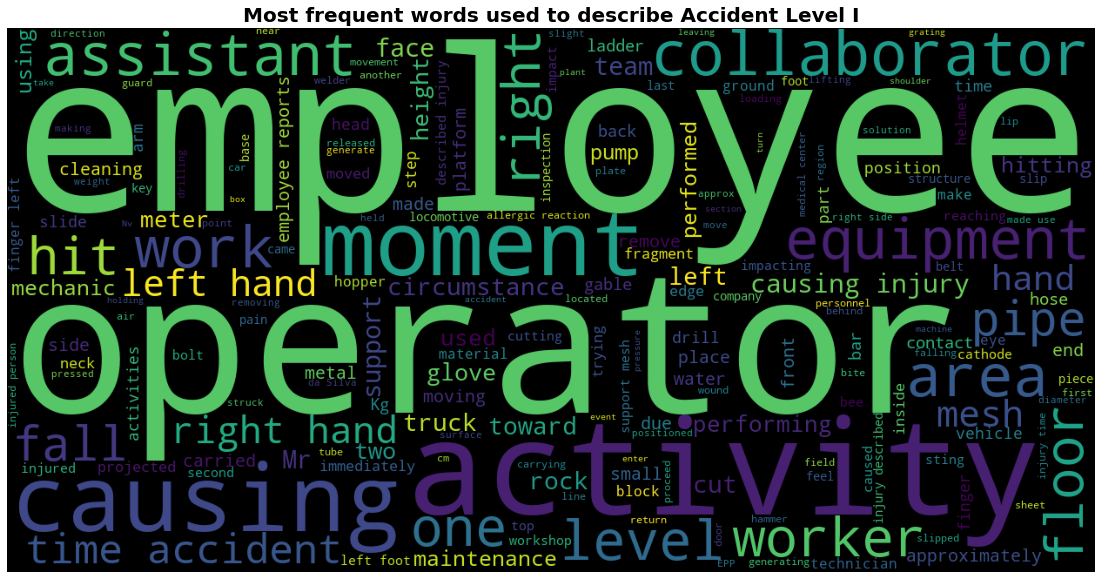

In [35]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='I'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level I", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

2. Accident Level II

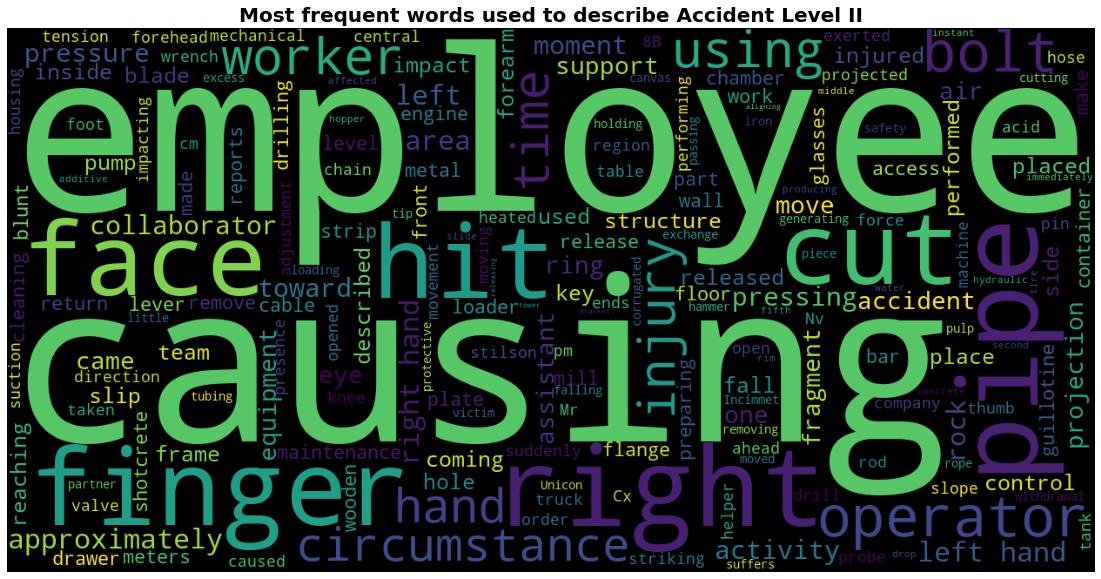

In [36]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='II'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level II", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

3. Accident Level III

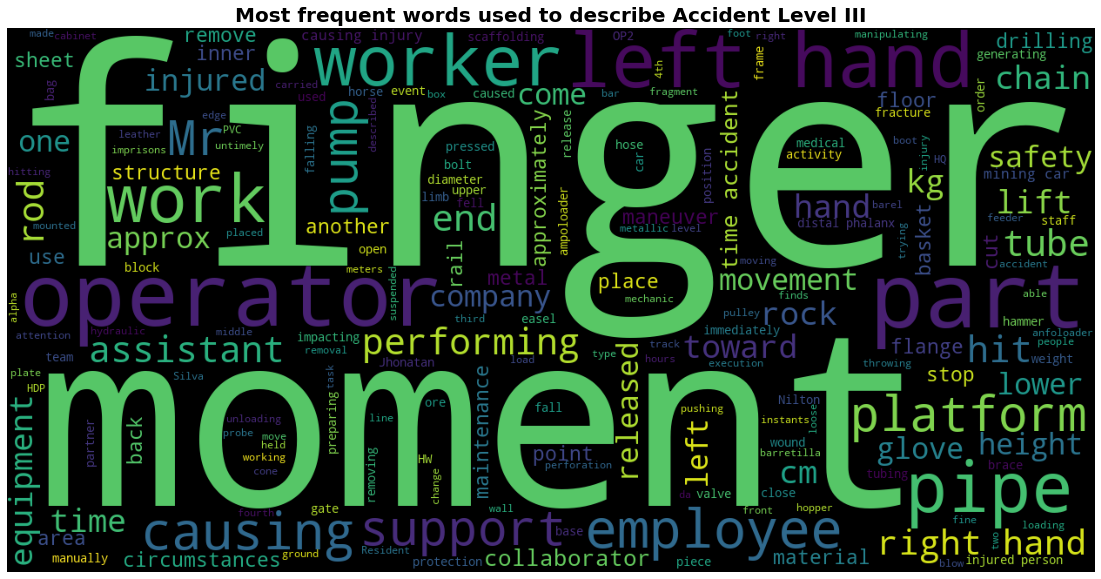

In [37]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='III'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level III", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

4. Accident Level IV

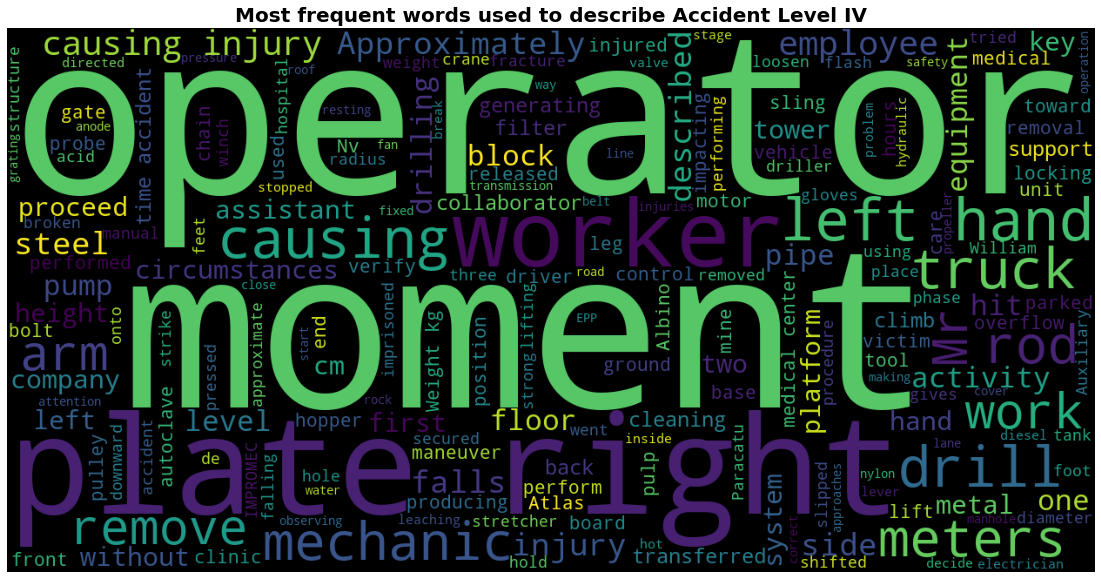

In [38]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='IV'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level IV", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Accident Level V

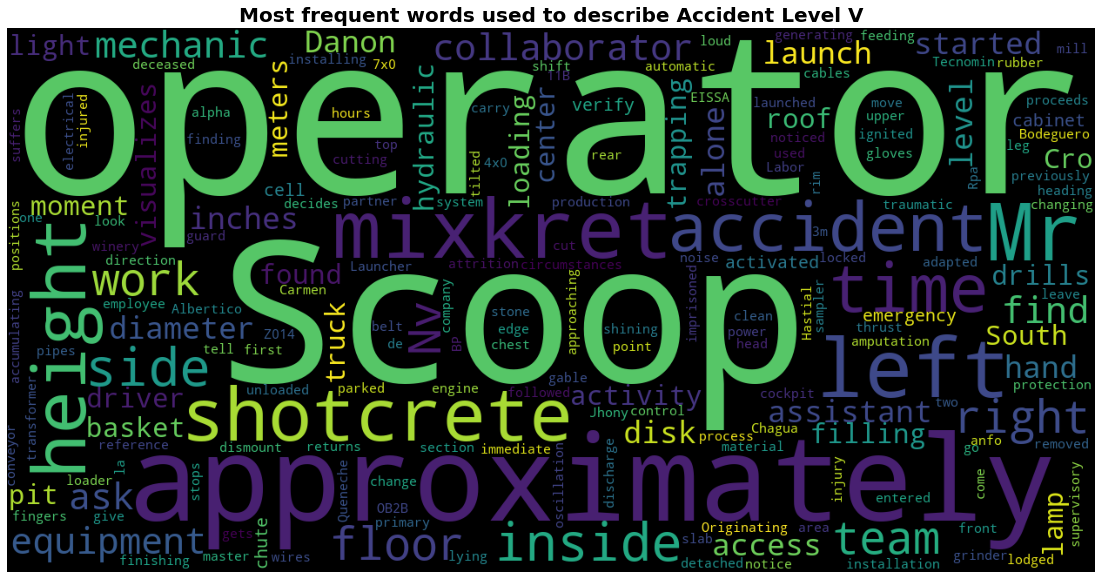

In [39]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='V'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level V", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

DATA AUGMENTATION

In [40]:
#Let us first create a dataset using only the class variable "Accident Level" and Description column.
accident_safety_data_trimmed=accident_safety_data_new.copy(True)
accident_safety_data_trimmed['Accident_Level']=accident_safety_data_trimmed.apply(lambda col: str(col['Accident Level']), axis=1)
accident_safety_data_trimmed['Description']=accident_safety_data_trimmed.apply(lambda col: str(col['Description']), axis=1)
accident_safety_data_trimmed=accident_safety_data_trimmed[['Accident_Level','Description']]
accident_safety_data_trimmed.head()

Accident_Level                                        Description
0              I  While removing the drill rod of the Jumbo 08 f...
1              I  During the activation of a sodium sulphide pum...
2              I  In the sub-station MILPO located at level +170...
3              I  Being 9:45 am. approximately in the Nv. 1880 C...
4             IV  Approximately at 11:45 a.m. in circumstances t...

In [41]:
labels, frequencies = np.unique(accident_safety_data_trimmed.Accident_Level.values, return_counts=True)

fig = px.pie(accident_safety_data_trimmed, values=frequencies, names=labels, title='Frequency of Description by Accident Level')
fig.show()


We can clearly see that the Description column is imbalanced in the dataset. Most of the description is present only for Accident Level I(0).

We will now check the exact counts of Descriptions per Accident level.

In [42]:
accident_safety_data_trimmed.Accident_Level.value_counts().values
for u in accident_safety_data_trimmed.Accident_Level.unique().tolist():
    print(u)

I
IV
III
II
V


Let us first divide our data into train and test samples

We will try  augmentation techniques so that the data is balanced properly before it is passed into the dataset.

EDA


Using EDA let us perform data augmentation

Let us divide data of each Accident Level in different dataframes

In [43]:
options=['II']
df_1=accident_safety_data_trimmed.copy(True)
df_1=df_1.loc[df_1['Accident_Level'].isin(options)]
df_1.shape

(40, 2)

In [44]:
options=['III']
df_2=accident_safety_data_trimmed.copy(True)
df_2=df_2.loc[df_2['Accident_Level'].isin(options)]
df_2.shape

(31, 2)

In [45]:
options=['IV']
df_3=accident_safety_data_trimmed.copy(True)
df_3=df_3.loc[df_3['Accident_Level'].isin(options)]
df_3.shape

(30, 2)

In [46]:
options=['V']
df_4=accident_safety_data_trimmed.copy(True)
df_4=df_4.loc[df_4['Accident_Level'].isin(options)]
df_4.shape

(8, 2)

Now, we will augment each dataset seperately. Here the gen_eda function from data_augmentation.py takes in the below parameters:

>dataset - dataframe name
>alpha_sr - percentage of words in the dataset we want to replace with synonyms.

>alpha_ri - percentage of words in the dataset we want to randomly insert.

>alpha_rs - percentage of words in the dataset we want to randomly swap.

>alpha_rd - percentage of words in the dataset we want to randomly delete.

>num_aug  - total number of augmented sentences we want per sentence in the dataset.

In [47]:
df_1_up=gen_eda(df_1,0.5,0.2,0.2,0.1,10)
df_2_up=gen_eda(df_2,0.5,0.2,0.2,0.1,10)
df_3_up=gen_eda(df_3,0.5,0.2,0.2,0.1,10)
df_4_up=gen_eda(df_4,0.5,0.2,0.2,0.1,30)

In [48]:
accident_safety_data_upsampled = pd.concat([df_1_up,df_2_up,df_3_up,df_4_up])

In [49]:
accident_safety_data_upsampled.describe().T

count  ... freq
Accident_Level  1359  ...  440
Description     1359  ...    2

[2 rows x 4 columns]

In [50]:
accident_safety_data_upsampled = accident_safety_data_upsampled.append(accident_safety_data_trimmed[accident_safety_data_trimmed.Accident_Level == 'I'])

In [51]:
print(accident_safety_data_trimmed.Description[0])
print(accident_safety_data_upsampled.Description[1])

While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
1    while positioning the in good order bracket ou...
1    atomic number  Rp 050 of even out 1620, in fat...
1    around at 11:45 ante meridiem in circumstance ...
1    just about 1:40 post meridiem in circumstance ...
1    During the activation of a sodium sulphide pum...
Name: Description, dtype: object


In [52]:
accident_safety_data_upsampled.head(10)

Accident_Level                                        Description
0             II  patch line up the right wing angle bracket of ...
1             II  while positioning the in good order bracket ou...
2             II  spell line up the right wing square bracket of...
3             II  While aligning the right bracket of tower N ° ...
4             II  While aligning the beat up respect right brack...
5             II  tenseness While frontage aligning use the righ...
6             II  While applied the right bracket of the alignin...
7             II  While operator hands right bracket of tower N ...
8             II  While aligning the ° of of tower N 1.5 32, the...
9             II  While aligning the right bracket of tower N ° ...

In [53]:
labels, frequencies = np.unique(accident_safety_data_upsampled.Accident_Level.values, return_counts=True)

fig = px.pie(accident_safety_data_upsampled, values=frequencies, names=labels, title='Frequency of Description by Accident Level')
fig.show()

In [54]:
accident_safety_data_upsampled["Description_DL"] = accident_safety_data_upsampled["Description"].apply(lambda x: clean_DL_data1(x))

In [55]:
accident_safety_data_upsampled["Description_ML"] = accident_safety_data_upsampled["Description"].apply(lambda x: clean_data(x))

In [56]:
accident_safety_data_upsampled.head(10)

Accident_Level  ...                                     Description_ML
0             II  ...  patch line right wing angl bracket predomin at...
1             II  ...  posit good order bracket loom atom number brin...
2             II  ...  spell line right wing squar bracket loom nitro...
3             II  ...  align right bracket tower opposit releas tensi...
4             II  ...  align beat respect right bracket tower releas ...
5             II  ...  tens frontag align use right bracket use tower...
6             II  ...  appli right bracket align toward releas beat a...
7             II  ...  oper hand right bracket tower releas releas te...
8             II  ...  align tower releas region appli tirford right ...
9             II  ...  align right bracket tower releas tension tirfo...

[10 rows x 4 columns]

In [57]:
print(accident_safety_data_upsampled.Description[1])
print(accident_safety_data_upsampled.Description_DL[1])
print(accident_safety_data_upsampled.Description_ML[1])

1    while positioning the in good order bracket ou...
1    atomic number  Rp 050 of even out 1620, in fat...
1    around at 11:45 ante meridiem in circumstance ...
1    just about 1:40 post meridiem in circumstance ...
1    During the activation of a sodium sulphide pum...
Name: Description, dtype: object
1    while positioning the in good order bracket ou...
1    atomic number  Rp  of even out  in fate where ...
1    around at  ante meridiem in circumstance that ...
1    just about 1 post meridiem in circumstance tha...
1    During the activation of a sodium sulphide pum...
Name: Description_DL, dtype: object
1    posit good order bracket loom atom number brin...
1    atom number even fate worker companion execut ...
1    around ant meridiem circumst greas monkey anth...
1    post meridiem circumst shotcret set polish est...
1    activ sodium sulphid pump pipe uncoupl sulfid ...
Name: Description_ML, dtype: object


Named entity recognition

In [58]:
accident_safety_data_upsampled.to_csv('upsampled_accident_safety_data.csv',index=False,encoding='utf-8')

In [59]:
accident_safety_upsampled_pos=pd.read_csv('upsampled_accident_safety_data.csv')

In [60]:
accident_safety_upsampled_pos['POSTags'] = pos_tag_sents(accident_safety_upsampled_pos['Description_DL'].apply(word_tokenize).tolist())

In [61]:
accident_safety_upsampled_pos.POSTags[:1]

0    [(patch, NN), (line, NN), (up, IN), (the, DT),...
Name: POSTags, dtype: object

Feature extraction. We will try the below vectorizers

1. Count Vectorizer
2. TF IDF vectorizer
3. WordVec
4. GlOve

We will first work with data cleaned for machine learning and then data cleaned for deep learning.

Using Count Vectorizer

In [62]:
#unigrams
count_train_cv_ML_1,features_cv_ML_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,1)
#count_train_cv_DL_1,features_cv_DL_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1)
count_train_cv_1,features_cv_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description,1)
x_orig_cv_1=pd.DataFrame(count_train_cv_1,columns=list(features_cv_1))
#x_DL_cv_1=pd.DataFrame(count_train_cv_DL_1,columns=list(features_cv_DL_1))
x_ML_cv_1=pd.DataFrame(count_train_cv_ML_1,columns=list(features_cv_ML_1))

#bigrams
count_train_cv_ML_2,features_cv_ML_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,2)
#count_train_cv_DL_2,features_cv_DL_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2)
count_train_cv_2,features_cv_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description,2)
x_orig_cv_2=pd.DataFrame(count_train_cv_2,columns=list(features_cv_2))
#x_DL_cv_2=pd.DataFrame(count_train_cv_DL_2,columns=list(features_cv_DL_2))
x_ML_cv_2=pd.DataFrame(count_train_cv_ML_2,columns=list(features_cv_ML_2))

#trigrams
count_train_cv_ML_3,features_cv_ML_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,3)
#count_train_cv_DL_3,features_cv_DL_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3)
count_train_cv_3,features_cv_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description,3)
x_orig_cv_3=pd.DataFrame(count_train_cv_3,columns=list(features_cv_3))
#x_DL_cv_3=pd.DataFrame(count_train_cv_DL_3,columns=list(features_cv_DL_3))
x_ML_cv_3=pd.DataFrame(count_train_cv_ML_3,columns=list(features_cv_ML_3))

In [63]:
#Let us see the shape of the dataset

#Deep learning dataset
# print('Number of unigram features generated in the deep learning dataset:',x_DL_cv_1.shape)
# print('Number of bigrams features generated in the deep learning dataset:',x_DL_cv_2.shape)
# print('Number of trigrams features generated in the deep learning dataset:',x_DL_cv_3.shape)

#Machine learning dataset
print('Number of unigram features generated in the machine learning dataset:',x_ML_cv_1.shape)
print('Number of bigrams features generated in the machine learning dataset:',x_ML_cv_2.shape)
print('Number of trigrams features generated in the machine learning dataset:',x_ML_cv_3.shape)

Number of unigram features generated in the machine learning dataset: (1668, 4401)
Number of bigrams features generated in the machine learning dataset: (1668, 39730)
Number of trigrams features generated in the machine learning dataset: (1668, 85877)


Since the number of features generated are very large in number, we will suffer from curse of dimensionality, hence reducing the number of features to 500

In [64]:
#unigrams
count_train_cv_ML_1,features_cv_ML_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,1,500)
#count_train_cv_DL_1,features_cv_DL_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1,500)
count_train_cv_1,features_cv_1 = count_vectorizer_features(accident_safety_upsampled_pos.Description,1,500)
x_orig_cv_1=pd.DataFrame(count_train_cv_1,columns=list(features_cv_1))
#x_DL_cv_1=pd.DataFrame(count_train_cv_DL_1,columns=list(features_cv_DL_1))
x_ML_cv_1=pd.DataFrame(count_train_cv_ML_1,columns=list(features_cv_ML_1))

#bigrams
count_train_cv_ML_2,features_cv_ML_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,2,500)
#count_train_cv_DL_2,features_cv_DL_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2,500)
count_train_cv_2,features_cv_2 = count_vectorizer_features(accident_safety_upsampled_pos.Description,2,500)
x_orig_cv_2=pd.DataFrame(count_train_cv_2,columns=list(features_cv_2))
#x_DL_cv_2=pd.DataFrame(count_train_cv_DL_2,columns=list(features_cv_DL_2))
x_ML_cv_2=pd.DataFrame(count_train_cv_ML_2,columns=list(features_cv_ML_2))

#trigrams
count_train_cv_ML_3,features_cv_ML_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description_ML,3,500)
#count_train_cv_DL_3,features_cv_DL_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3,500)
count_train_cv_3,features_cv_3 = count_vectorizer_features(accident_safety_upsampled_pos.Description,3,500)
x_orig_cv_3=pd.DataFrame(count_train_cv_3,columns=list(features_cv_3))
#x_DL_cv_3=pd.DataFrame(count_train_cv_DL_3,columns=list(features_cv_DL_3))
x_ML_cv_3=pd.DataFrame(count_train_cv_ML_3,columns=list(features_cv_ML_3))

Deep learning features

In [65]:
# #print unigram features
# print(count_train_cv_DL_1.shape)
# print(features_cv_DL_1[:50])

# #print bigram features
# print(count_train_cv_DL_2.shape)
# print(features_cv_DL_2[:50])

# #print trigram features
# print(count_train_cv_DL_3.shape)
# print(features_cv_DL_3[:50])

Machine learning features

In [66]:
#print unigram features
print(count_train_cv_ML_1.shape)
print(features_cv_ML_1[:50])

#print bigram features
print(count_train_cv_ML_2.shape)
print(features_cv_ML_2[:50])

#print trigram features
print(count_train_cv_ML_3.shape)
print(features_cv_ML_3[:50])

(1668, 500)
['access', 'accid', 'accumul', 'acid', 'activ', 'actor', 'adenyl', 'adjust', 'affect', 'air', 'albertico', 'albino', 'allow', 'alon', 'along', 'alpha', 'amp', 'ampoload', 'amput', 'anchor', 'anfo', 'anoth', 'approach', 'approx', 'approxim', 'area', 'arm', 'around', 'arrang', 'ask', 'assembl', 'assist', 'astatin', 'atom', 'attent', 'auxiliari', 'away', 'back', 'bag', 'balanc', 'bar', 'base', 'basket', 'bear', 'begin', 'behind', 'belt', 'bit', 'blade', 'block']
(1668, 500)
['access', 'accid', 'accid employe', 'accumul', 'acid', 'activ', 'actor', 'adjust', 'affect', 'air', 'albertico', 'albino', 'allow', 'alon', 'along', 'alpha', 'amp', 'ampoload', 'anchor', 'anfo', 'anoth', 'approach', 'approx', 'approxim', 'area', 'arm', 'around', 'arrang', 'ask', 'assembl', 'assist', 'astatin', 'atom', 'atom number', 'attent', 'auxiliari', 'away', 'back', 'bag', 'bar', 'base', 'basket', 'bear', 'begin', 'belt', 'bit', 'blade', 'block', 'blow', 'board']
(1668, 500)
['access', 'accid', 'accid

In [67]:
x_ML_cv_3.head()

access  accid  accid employe  accumul  ...  work area  worker  wound  yield
0       0      0              0        0  ...          0       0      0      0
1       0      0              0        0  ...          0       0      0      0
2       0      0              0        0  ...          0       0      0      0
3       0      0              0        0  ...          0       0      0      0
4       0      0              0        0  ...          0       0      0      0

[5 rows x 500 columns]

2. Now we will use TF IDF Vectorizer also.

In [68]:
#unigrams
count_train_tfidf_ML_1,features_tfidf_ML_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,1)
#count_train_tfidf_DL_1,features_tfidf_DL_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1)
count_train_tfidf_1,features_tfidf_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1)
x_orig_tfidf_1=pd.DataFrame(count_train_tfidf_1,columns=list(features_tfidf_1))
#x_DL_tfidf_1=pd.DataFrame(count_train_tfidf_DL_1,columns=list(features_tfidf_DL_1))
x_ML_tfidf_1=pd.DataFrame(count_train_tfidf_ML_1,columns=list(features_tfidf_ML_1))

#bigrams
count_train_tfidf_ML_2,features_tfidf_ML_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,2)
#count_train_tfidf_DL_2,features_tfidf_DL_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2)
count_train_tfidf_2,features_tfidf_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2)
x_orig_tfidf_2=pd.DataFrame(count_train_tfidf_2,columns=list(features_tfidf_2))
#x_DL_tfidf_2=pd.DataFrame(count_train_tfidf_DL_2,columns=list(features_tfidf_DL_2))
x_ML_tfidf_2=pd.DataFrame(count_train_tfidf_ML_2,columns=list(features_tfidf_ML_2))

#trigrams
count_train_tfidf_ML_3,features_tfidf_ML_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,3)
#count_train_tfidf_DL_3,features_tfidf_DL_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3)
count_train_tfidf_3,features_tfidf_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3)
x_orig_tfidf_3=pd.DataFrame(count_train_tfidf_3,columns=list(features_tfidf_3))
#x_DL_tfidf_3=pd.DataFrame(count_train_tfidf_DL_3,columns=list(features_tfidf_DL_3))
x_ML_tfidf_3=pd.DataFrame(count_train_tfidf_ML_3,columns=list(features_tfidf_ML_3))

In [69]:
#Let us see the shape of the dataset

#Deep learning dataset
# print('Number of unigram features generated in the deep learning dataset:',x_DL_tfidf_1.shape)
# print('Number of bigrams features generated in the deep learning dataset:',x_DL_tfidf_2.shape)
# print('Number of trigrams features generated in the deep learning dataset:',x_DL_tfidf_3.shape)

#Machine learning dataset
print('Number of unigram features generated in the machine learning dataset:',x_ML_tfidf_1.shape)
print('Number of bigrams features generated in the machine learning dataset:',x_ML_tfidf_2.shape)
print('Number of trigrams features generated in the machine learning dataset:',x_ML_tfidf_3.shape)

Number of unigram features generated in the machine learning dataset: (1668, 4401)
Number of bigrams features generated in the machine learning dataset: (1668, 39730)
Number of trigrams features generated in the machine learning dataset: (1668, 85877)


In [70]:
#Reducing the features to 500
#unigrams
count_train_tfidf_ML_1,features_tfidf_ML_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,1,500)
#count_train_tfidf_DL_1,features_tfidf_DL_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1,500)
count_train_tfidf_1,features_tfidf_1 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,1,500)
x_orig_tfidf_1=pd.DataFrame(count_train_tfidf_1,columns=list(features_tfidf_1))
#x_DL_tfidf_1=pd.DataFrame(count_train_tfidf_DL_1,columns=list(features_tfidf_DL_1))
x_ML_tfidf_1=pd.DataFrame(count_train_tfidf_ML_1,columns=list(features_tfidf_ML_1))

#bigrams
count_train_tfidf_ML_2,features_tfidf_ML_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,2,500)
#count_train_tfidf_DL_2,features_tfidf_DL_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2,500)
count_train_tfidf_2,features_tfidf_2 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,2,500)
x_orig_tfidf_2=pd.DataFrame(count_train_tfidf_2,columns=list(features_tfidf_2))
#x_DL_tfidf_2=pd.DataFrame(count_train_tfidf_DL_2,columns=list(features_tfidf_DL_2))
x_ML_tfidf_2=pd.DataFrame(count_train_tfidf_ML_2,columns=list(features_tfidf_ML_2))

#trigrams
count_train_tfidf_ML_3,features_tfidf_ML_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_ML,3,500)
#count_train_tfidf_DL_3,features_tfidf_DL_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3,500)
count_train_tfidf_3,features_tfidf_3 = tfidf_vectorizer_features(accident_safety_upsampled_pos.Description_DL,3,500)
x_orig_tfidf_3=pd.DataFrame(count_train_tfidf_3,columns=list(features_tfidf_3))
#x_DL_tfidf_3=pd.DataFrame(count_train_tfidf_DL_3,columns=list(features_tfidf_DL_3))
x_ML_tfidf_3=pd.DataFrame(count_train_tfidf_ML_3,columns=list(features_tfidf_ML_3))

Deep learning features for TF IDF vectorizer

Machine learning features for TF IDF vectorizer

In [72]:
#print unigram features
print(count_train_tfidf_ML_1.shape)
print(features_tfidf_ML_1[:50])

#print bigram features
print(count_train_tfidf_ML_2.shape)
print(features_tfidf_ML_2[:50])

#print trigram features
print(count_train_tfidf_ML_3.shape)
print(features_tfidf_ML_3[:50])

(1668, 500)
['access', 'accid', 'accumul', 'acid', 'activ', 'actor', 'adenyl', 'adjust', 'affect', 'air', 'albertico', 'albino', 'allow', 'alon', 'along', 'alpha', 'amp', 'ampoload', 'amput', 'anchor', 'anfo', 'anoth', 'approach', 'approx', 'approxim', 'area', 'arm', 'around', 'arrang', 'ask', 'assembl', 'assist', 'astatin', 'atom', 'attent', 'auxiliari', 'away', 'back', 'bag', 'balanc', 'bar', 'base', 'basket', 'bear', 'begin', 'behind', 'belt', 'bit', 'blade', 'block']
(1668, 500)
['access', 'accid', 'accid employe', 'accumul', 'acid', 'activ', 'actor', 'adjust', 'affect', 'air', 'albertico', 'albino', 'allow', 'alon', 'along', 'alpha', 'amp', 'ampoload', 'anchor', 'anfo', 'anoth', 'approach', 'approx', 'approxim', 'area', 'arm', 'around', 'arrang', 'ask', 'assembl', 'assist', 'astatin', 'atom', 'atom number', 'attent', 'auxiliari', 'away', 'back', 'bag', 'bar', 'base', 'basket', 'bear', 'begin', 'belt', 'bit', 'blade', 'block', 'blow', 'board']
(1668, 500)
['access', 'accid', 'accid

Let us now one hot encode the class variable Accident Level

In [73]:
lb_make = LabelEncoder()
accident_safety_upsampled_pos['Accident_Level'] = lb_make.fit_transform(accident_safety_upsampled_pos['Accident_Level'])

In [74]:
y_DL = pd.get_dummies(accident_safety_upsampled_pos['Accident_Level']).values
y_ML = pd.get_dummies(accident_safety_upsampled_pos['Accident_Level']).values
y_orig = pd.get_dummies(accident_safety_upsampled_pos['Accident_Level']).values

In [75]:
x_ML_cv_1 = x_ML_cv_1.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
x_ML_cv_2 = x_ML_cv_2.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
x_ML_cv_3 = x_ML_cv_3.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
#x_DL_cv_1 = x_DL_cv_1.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
#x_DL_cv_2 = x_DL_cv_2.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
#x_DL_cv_3 = x_DL_cv_3.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
# x_DL_tfidf_1 = x_DL_tfidf_1.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
# x_DL_tfidf_2 = x_DL_tfidf_2.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
# x_DL_tfidf_3 = x_DL_tfidf_3.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
x_ML_tfidf_1 = x_ML_tfidf_1.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
x_ML_tfidf_2 = x_ML_tfidf_2.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))
x_ML_tfidf_3 = x_ML_tfidf_3.join(accident_safety_upsampled_pos['Accident_Level'].reset_index(drop=True))

Now our data is ready, so we can divide the data into test and train.

Dataset to be used for deep learning

Count Vectorized data

>Unigrams :
x_DL_cv_1 , y_DL

>Bigrams : 
x_DL_cv_2 , y_DL

>Trigrams : 
x_DL_cv_3 , y_DL


TF IDF Vectorized data

>Unigrams :
x_DL_tfidf_1 , y_DL

>Bigrams : 
x_DL_tfidf_2 , y_DL

>Trigrams : 
x_DL_tfidf_3 , y_DL

Dataset to be used for machine learning models

Count Vectorized data

>Unigrams : 
x_ML_cv_1 , y_ML

>Bigrams : 
x_ML_cv_2 , y_ML

>Trigrams : 
x_ML_cv_3 , y_ML

TF IDF Vectorized data

>Unigrams : 
x_ML_tfidf_1 , y_ML

>Bigrams : 
x_ML_tfidf_2 , y_ML

>Trigrams : 
x_ML_tfidf_3 , y_ML

Let us now input this data into machine learning models

Step 1

1. Split the data into 80 and 20
2. Using TF IDF vectorized data
3. Unigrams

In [76]:
X=x_ML_tfidf_1.drop(['Accident_Level'],axis=1)
Y=x_ML_tfidf_1.Accident_Level

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1334, 500)
(334, 500)
(1334,)
(334,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


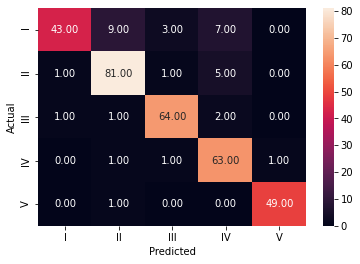

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        62
           1       0.87      0.92      0.90        88
           2       0.93      0.94      0.93        68
           3       0.82      0.95      0.88        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.90      0.90      0.90       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1  Logistic Regression        0.963268  ...  0.896051             0.579737

[1 rows x 7 columns]

In [79]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


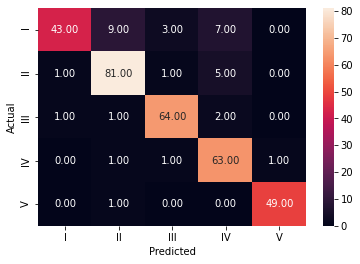

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        62
           1       0.87      0.92      0.90        88
           2       0.93      0.94      0.93        68
           3       0.82      0.95      0.88        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.90      0.90      0.90       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


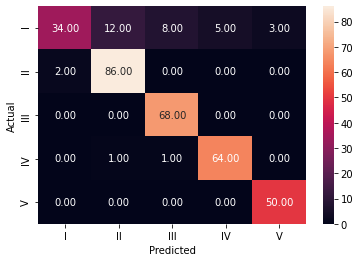

              precision    recall  f1-score   support

           0       0.94      0.55      0.69        62
           1       0.87      0.98      0.92        88
           2       0.88      1.00      0.94        68
           3       0.93      0.97      0.95        66
           4       0.94      1.00      0.97        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.89       334
weighted avg       0.91      0.90      0.89       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


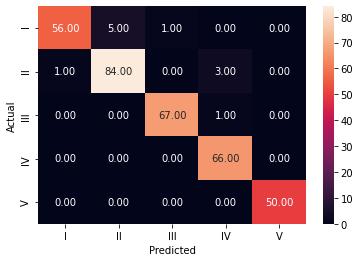

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        62
           1       0.94      0.95      0.95        88
           2       0.99      0.99      0.99        68
           3       0.94      1.00      0.97        66
           4       1.00      1.00      1.00        50

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


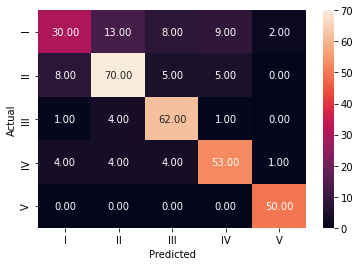

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        62
           1       0.77      0.80      0.78        88
           2       0.78      0.91      0.84        68
           3       0.78      0.80      0.79        66
           4       0.94      1.00      0.97        50

    accuracy                           0.79       334
   macro avg       0.79      0.80      0.79       334
weighted avg       0.79      0.79      0.79       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

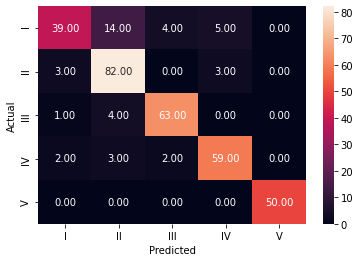

              precision    recall  f1-score   support

           0       0.87      0.63      0.73        62
           1       0.80      0.93      0.86        88
           2       0.91      0.93      0.92        68
           3       0.88      0.89      0.89        66
           4       1.00      1.00      1.00        50

    accuracy                           0.88       334
   macro avg       0.89      0.88      0.88       334
weighted avg       0.88      0.88      0.87       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


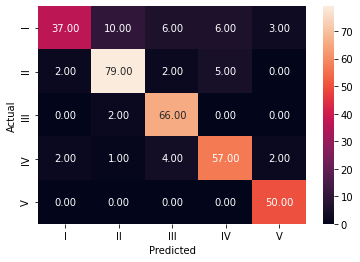

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        62
           1       0.86      0.90      0.88        88
           2       0.85      0.97      0.90        68
           3       0.84      0.86      0.85        66
           4       0.91      1.00      0.95        50

    accuracy                           0.87       334
   macro avg       0.87      0.87      0.86       334
weighted avg       0.87      0.87      0.86       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


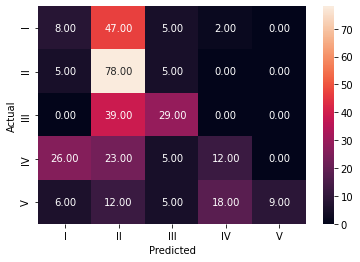

              precision    recall  f1-score   support

           0       0.18      0.13      0.15        62
           1       0.39      0.89      0.54        88
           2       0.59      0.43      0.50        68
           3       0.38      0.18      0.24        66
           4       1.00      0.18      0.31        50

    accuracy                           0.41       334
   macro avg       0.51      0.36      0.35       334
weighted avg       0.48      0.41      0.37       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

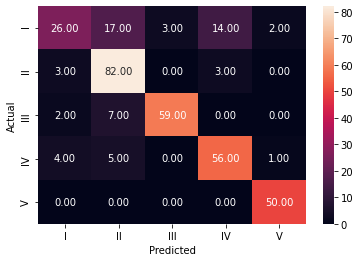

              precision    recall  f1-score   support

           0       0.74      0.42      0.54        62
           1       0.74      0.93      0.82        88
           2       0.95      0.87      0.91        68
           3       0.77      0.85      0.81        66
           4       0.94      1.00      0.97        50

    accuracy                           0.82       334
   macro avg       0.83      0.81      0.81       334
weighted avg       0.82      0.82      0.81       334

***************************************************************************


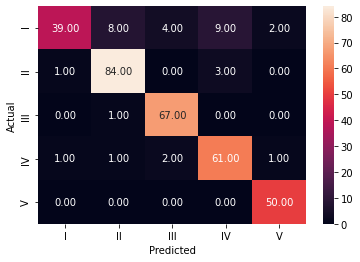

              precision    recall  f1-score   support

           0       0.95      0.63      0.76        62
           1       0.89      0.95      0.92        88
           2       0.92      0.99      0.95        68
           3       0.84      0.92      0.88        66
           4       0.94      1.00      0.97        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.91      0.90      0.90       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

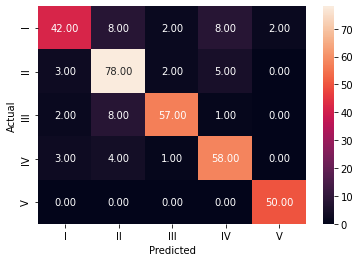

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        62
           1       0.80      0.89      0.84        88
           2       0.92      0.84      0.88        68
           3       0.81      0.88      0.84        66
           4       0.96      1.00      0.98        50

    accuracy                           0.85       334
   macro avg       0.86      0.86      0.86       334
weighted avg       0.86      0.85      0.85       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.963268  ...  0.896051             0.579737
2         KNeighborsClassifier        0.955022  ...  0.894797             2.145294
3                          SVC        0.995502  ...  0.966878             0.131930
4       DecisionTreeClassifier        0.997751  ...  0.785535             6.835455
5       RandomForestClassifier        0.996252  ...  0.873811             0.771475
6            BaggingClassifier        0.996252  ...  0.859389             0.420270
7           AdaBoostClassifier        0.454273  ...  0.365960             1.365679
8   GradientBoostingClassifier        0.955022  ...  0.806007             0.623064
9           CatBoostClassifier        0.997001  ...  0.896042             0.378040
10               XGBClassifier        0.978261  ...  0.851602             0.435448

[10 rows x 7 columns]

In [80]:
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

Let us now perform the same steps with 

Step 1

1. Split the data into 80 and 20
2. Using TF IDF vectorized data
3. Bi grams

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


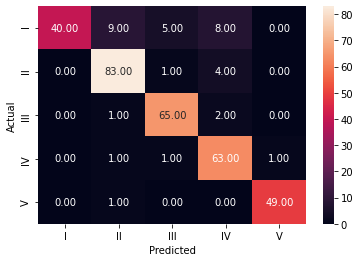

              precision    recall  f1-score   support

           0       1.00      0.65      0.78        62
           1       0.87      0.94      0.91        88
           2       0.90      0.96      0.93        68
           3       0.82      0.95      0.88        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.91      0.90      0.89       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


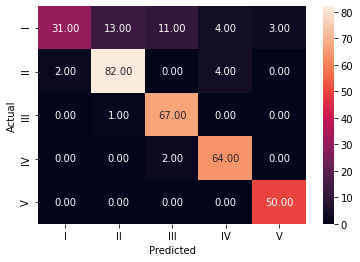

              precision    recall  f1-score   support

           0       0.94      0.50      0.65        62
           1       0.85      0.93      0.89        88
           2       0.84      0.99      0.91        68
           3       0.89      0.97      0.93        66
           4       0.94      1.00      0.97        50

    accuracy                           0.88       334
   macro avg       0.89      0.88      0.87       334
weighted avg       0.89      0.88      0.87       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


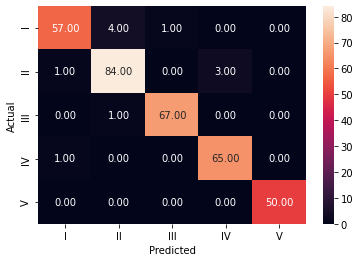

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.94      0.95      0.95        88
           2       0.99      0.99      0.99        68
           3       0.96      0.98      0.97        66
           4       1.00      1.00      1.00        50

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


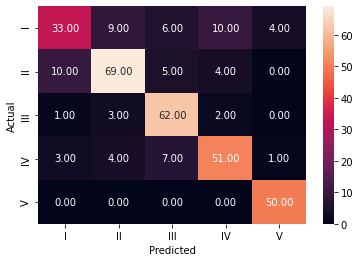

              precision    recall  f1-score   support

           0       0.70      0.53      0.61        62
           1       0.81      0.78      0.80        88
           2       0.78      0.91      0.84        68
           3       0.76      0.77      0.77        66
           4       0.91      1.00      0.95        50

    accuracy                           0.79       334
   macro avg       0.79      0.80      0.79       334
weighted avg       0.79      0.79      0.79       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

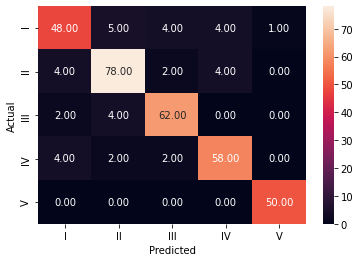

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        62
           1       0.88      0.89      0.88        88
           2       0.89      0.91      0.90        68
           3       0.88      0.88      0.88        66
           4       0.98      1.00      0.99        50

    accuracy                           0.89       334
   macro avg       0.89      0.89      0.89       334
weighted avg       0.89      0.89      0.89       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


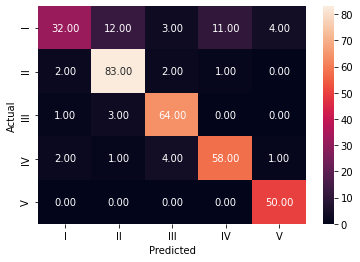

              precision    recall  f1-score   support

           0       0.86      0.52      0.65        62
           1       0.84      0.94      0.89        88
           2       0.88      0.94      0.91        68
           3       0.83      0.88      0.85        66
           4       0.91      1.00      0.95        50

    accuracy                           0.86       334
   macro avg       0.86      0.86      0.85       334
weighted avg       0.86      0.86      0.85       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


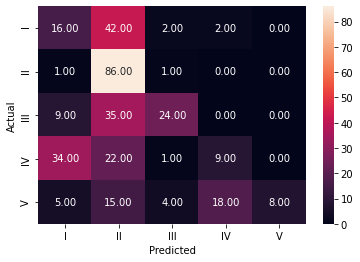

              precision    recall  f1-score   support

           0       0.25      0.26      0.25        62
           1       0.43      0.98      0.60        88
           2       0.75      0.35      0.48        68
           3       0.31      0.14      0.19        66
           4       1.00      0.16      0.28        50

    accuracy                           0.43       334
   macro avg       0.55      0.38      0.36       334
weighted avg       0.52      0.43      0.38       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

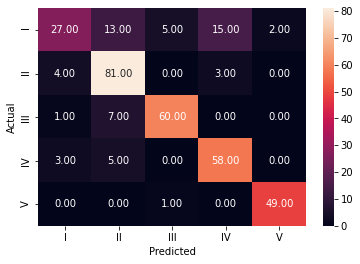

              precision    recall  f1-score   support

           0       0.77      0.44      0.56        62
           1       0.76      0.92      0.84        88
           2       0.91      0.88      0.90        68
           3       0.76      0.88      0.82        66
           4       0.96      0.98      0.97        50

    accuracy                           0.82       334
   macro avg       0.83      0.82      0.81       334
weighted avg       0.82      0.82      0.81       334

***************************************************************************


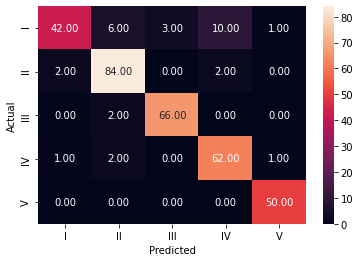

              precision    recall  f1-score   support

           0       0.93      0.68      0.79        62
           1       0.89      0.95      0.92        88
           2       0.96      0.97      0.96        68
           3       0.84      0.94      0.89        66
           4       0.96      1.00      0.98        50

    accuracy                           0.91       334
   macro avg       0.92      0.91      0.91       334
weighted avg       0.91      0.91      0.91       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

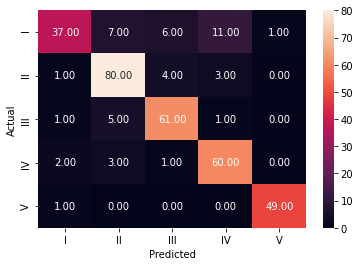

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        62
           1       0.84      0.91      0.87        88
           2       0.85      0.90      0.87        68
           3       0.80      0.91      0.85        66
           4       0.98      0.98      0.98        50

    accuracy                           0.86       334
   macro avg       0.87      0.86      0.86       334
weighted avg       0.86      0.86      0.85       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.967766  ...  0.894459             0.587497
2         KNeighborsClassifier        0.956522  ...  0.868942             2.363860
3                          SVC        0.995502  ...  0.966972             0.130748
4       DecisionTreeClassifier        0.997751  ...  0.787265             6.938305
5       RandomForestClassifier        0.995502  ...  0.885526             0.584425
6            BaggingClassifier        0.997001  ...  0.849827             0.425176
7           AdaBoostClassifier        0.447526  ...  0.380587             1.375322
8   GradientBoostingClassifier        0.959520  ...  0.812353             0.631259
9           CatBoostClassifier        0.997001  ...  0.906882             0.386229
10               XGBClassifier        0.974513  ...  0.854738             0.437499

[10 rows x 7 columns]

In [81]:
#unigrams and bigrams
X=x_ML_tfidf_2.drop(['Accident_Level'],axis=1)
Y=x_ML_tfidf_2.Accident_Level
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


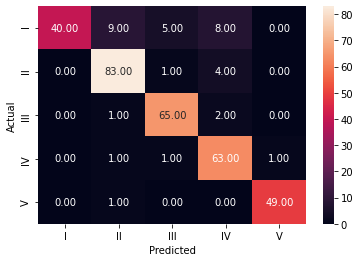

              precision    recall  f1-score   support

           0       1.00      0.65      0.78        62
           1       0.87      0.94      0.91        88
           2       0.90      0.96      0.93        68
           3       0.82      0.95      0.88        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.91      0.90      0.89       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


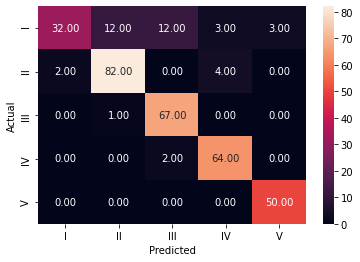

              precision    recall  f1-score   support

           0       0.94      0.52      0.67        62
           1       0.86      0.93      0.90        88
           2       0.83      0.99      0.90        68
           3       0.90      0.97      0.93        66
           4       0.94      1.00      0.97        50

    accuracy                           0.88       334
   macro avg       0.90      0.88      0.87       334
weighted avg       0.89      0.88      0.87       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


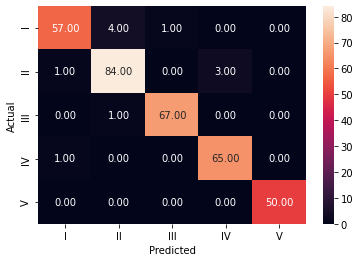

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.94      0.95      0.95        88
           2       0.99      0.99      0.99        68
           3       0.96      0.98      0.97        66
           4       1.00      1.00      1.00        50

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


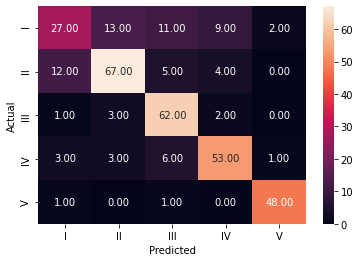

              precision    recall  f1-score   support

           0       0.61      0.44      0.51        62
           1       0.78      0.76      0.77        88
           2       0.73      0.91      0.81        68
           3       0.78      0.80      0.79        66
           4       0.94      0.96      0.95        50

    accuracy                           0.77       334
   macro avg       0.77      0.77      0.77       334
weighted avg       0.76      0.77      0.76       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

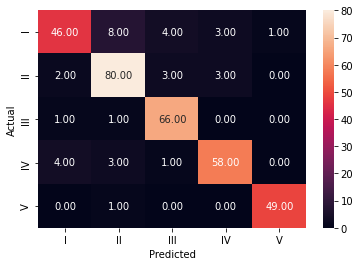

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        62
           1       0.86      0.91      0.88        88
           2       0.89      0.97      0.93        68
           3       0.91      0.88      0.89        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.90      0.90      0.90       334
weighted avg       0.90      0.90      0.89       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


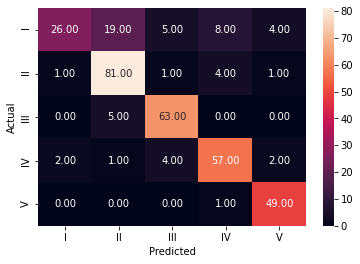

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        62
           1       0.76      0.92      0.84        88
           2       0.86      0.93      0.89        68
           3       0.81      0.86      0.84        66
           4       0.88      0.98      0.92        50

    accuracy                           0.83       334
   macro avg       0.84      0.82      0.81       334
weighted avg       0.84      0.83      0.81       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


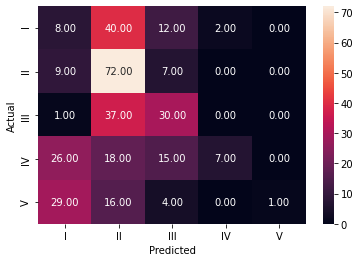

              precision    recall  f1-score   support

           0       0.11      0.13      0.12        62
           1       0.39      0.82      0.53        88
           2       0.44      0.44      0.44        68
           3       0.78      0.11      0.19        66
           4       1.00      0.02      0.04        50

    accuracy                           0.35       334
   macro avg       0.54      0.30      0.26       334
weighted avg       0.52      0.35      0.29       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

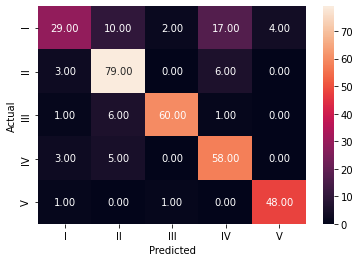

              precision    recall  f1-score   support

           0       0.78      0.47      0.59        62
           1       0.79      0.90      0.84        88
           2       0.95      0.88      0.92        68
           3       0.71      0.88      0.78        66
           4       0.92      0.96      0.94        50

    accuracy                           0.82       334
   macro avg       0.83      0.82      0.81       334
weighted avg       0.83      0.82      0.81       334

***************************************************************************


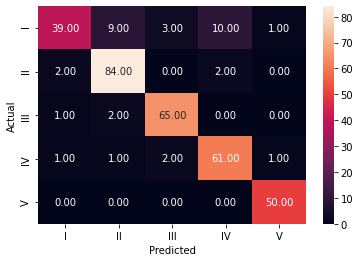

              precision    recall  f1-score   support

           0       0.91      0.63      0.74        62
           1       0.88      0.95      0.91        88
           2       0.93      0.96      0.94        68
           3       0.84      0.92      0.88        66
           4       0.96      1.00      0.98        50

    accuracy                           0.90       334
   macro avg       0.90      0.89      0.89       334
weighted avg       0.90      0.90      0.89       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

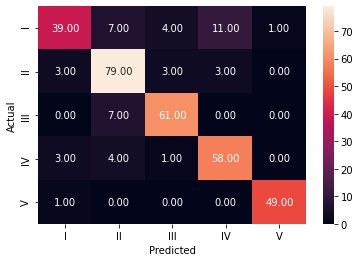

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        62
           1       0.81      0.90      0.85        88
           2       0.88      0.90      0.89        68
           3       0.81      0.88      0.84        66
           4       0.98      0.98      0.98        50

    accuracy                           0.86       334
   macro avg       0.87      0.86      0.86       334
weighted avg       0.86      0.86      0.85       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.968516  ...  0.894459             0.589495
2         KNeighborsClassifier        0.958021  ...  0.872931             2.263740
3                          SVC        0.995502  ...  0.966972             0.131612
4       DecisionTreeClassifier        0.997751  ...  0.761077             7.765581
5       RandomForestClassifier        0.996252  ...  0.893694             0.410879
6            BaggingClassifier        0.996252  ...  0.812063             0.442270
7           AdaBoostClassifier        0.396552  ...  0.294578             1.402204
8   GradientBoostingClassifier        0.957271  ...  0.812453             0.644229
9           CatBoostClassifier        0.997001  ...  0.890451             0.394534
10               XGBClassifier        0.975262  ...  0.853196             0.443156

[10 rows x 7 columns]

In [82]:
#unigrams bigrams and trigrams
X=x_ML_tfidf_3.drop(['Accident_Level'],axis=1)
Y=x_ML_tfidf_3.Accident_Level
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

We can see that SVC gives us the best accuracy and the lowest loss as compared to the other machine learning models.

It is followed by the Catboost classifier which gives us the next best results.

Let us see what results we get using count vectorized data.


1. Unigrams

(1334, 500)
(334, 500)
(1334,)
(334,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


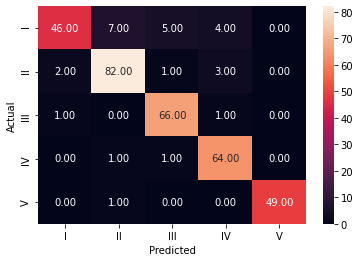

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        62
           1       0.90      0.93      0.92        88
           2       0.90      0.97      0.94        68
           3       0.89      0.97      0.93        66
           4       1.00      0.98      0.99        50

    accuracy                           0.92       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.92      0.92      0.92       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


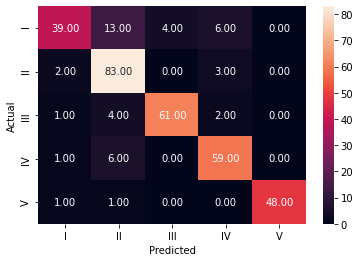

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        62
           1       0.78      0.94      0.85        88
           2       0.94      0.90      0.92        68
           3       0.84      0.89      0.87        66
           4       1.00      0.96      0.98        50

    accuracy                           0.87       334
   macro avg       0.89      0.86      0.87       334
weighted avg       0.88      0.87      0.87       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


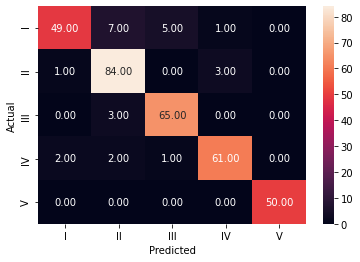

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        62
           1       0.88      0.95      0.91        88
           2       0.92      0.96      0.94        68
           3       0.94      0.92      0.93        66
           4       1.00      1.00      1.00        50

    accuracy                           0.93       334
   macro avg       0.93      0.92      0.93       334
weighted avg       0.93      0.93      0.92       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


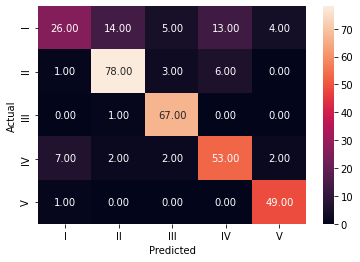

              precision    recall  f1-score   support

           0       0.74      0.42      0.54        62
           1       0.82      0.89      0.85        88
           2       0.87      0.99      0.92        68
           3       0.74      0.80      0.77        66
           4       0.89      0.98      0.93        50

    accuracy                           0.82       334
   macro avg       0.81      0.81      0.80       334
weighted avg       0.81      0.82      0.80       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

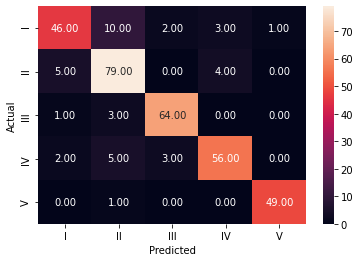

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        62
           1       0.81      0.90      0.85        88
           2       0.93      0.94      0.93        68
           3       0.89      0.85      0.87        66
           4       0.98      0.98      0.98        50

    accuracy                           0.88       334
   macro avg       0.89      0.88      0.89       334
weighted avg       0.88      0.88      0.88       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


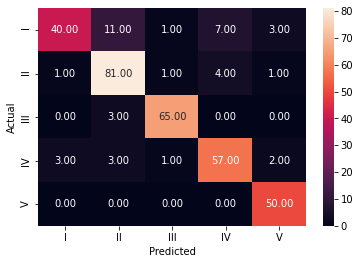

              precision    recall  f1-score   support

           0       0.91      0.65      0.75        62
           1       0.83      0.92      0.87        88
           2       0.96      0.96      0.96        68
           3       0.84      0.86      0.85        66
           4       0.89      1.00      0.94        50

    accuracy                           0.88       334
   macro avg       0.88      0.88      0.88       334
weighted avg       0.88      0.88      0.87       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


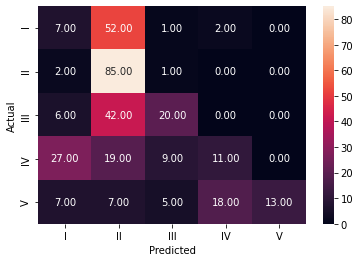

              precision    recall  f1-score   support

           0       0.14      0.11      0.13        62
           1       0.41      0.97      0.58        88
           2       0.56      0.29      0.38        68
           3       0.35      0.17      0.23        66
           4       1.00      0.26      0.41        50

    accuracy                           0.41       334
   macro avg       0.49      0.36      0.35       334
weighted avg       0.47      0.41      0.36       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

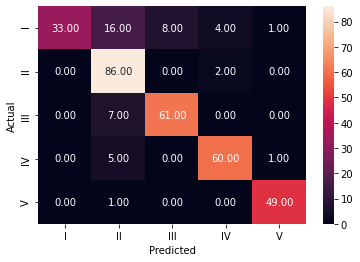

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        62
           1       0.75      0.98      0.85        88
           2       0.88      0.90      0.89        68
           3       0.91      0.91      0.91        66
           4       0.96      0.98      0.97        50

    accuracy                           0.87       334
   macro avg       0.90      0.86      0.86       334
weighted avg       0.89      0.87      0.86       334

***************************************************************************


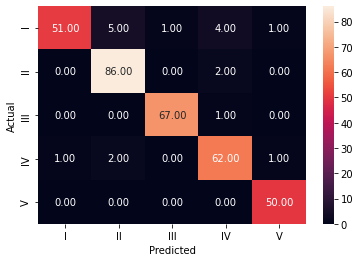

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        62
           1       0.92      0.98      0.95        88
           2       0.99      0.99      0.99        68
           3       0.90      0.94      0.92        66
           4       0.96      1.00      0.98        50

    accuracy                           0.95       334
   macro avg       0.95      0.94      0.95       334
weighted avg       0.95      0.95      0.95       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

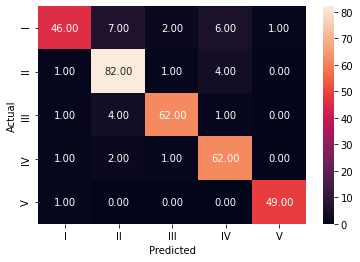

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        62
           1       0.86      0.93      0.90        88
           2       0.94      0.91      0.93        68
           3       0.85      0.94      0.89        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.90      0.90      0.90       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.994003  ...  0.917320             0.285788
2         KNeighborsClassifier        0.928786  ...  0.865736             2.243816
3                          SVC        0.974513  ...  0.924278             0.184021
4       DecisionTreeClassifier        0.997751  ...  0.803764             6.108177
5       RandomForestClassifier        0.994753  ...  0.879522             0.537968
6            BaggingClassifier        0.997751  ...  0.873523             0.358140
7           AdaBoostClassifier        0.436282  ...  0.361185             1.342110
8   GradientBoostingClassifier        0.927286  ...  0.858398             0.582597
9           CatBoostClassifier        0.993253  ...  0.945329             0.268475
10               XGBClassifier        0.966267  ...  0.899985             0.403251

[10 rows x 7 columns]

In [83]:
X=x_ML_cv_1.drop(['Accident_Level'],axis=1)
Y=x_ML_cv_1.Accident_Level
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

2. Bi grams


(1334, 500)
(334, 500)
(1334,)
(334,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


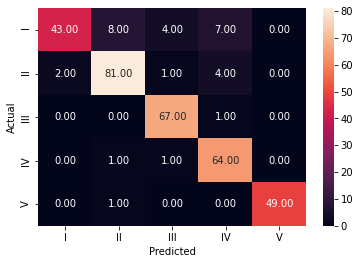

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        62
           1       0.89      0.92      0.91        88
           2       0.92      0.99      0.95        68
           3       0.84      0.97      0.90        66
           4       1.00      0.98      0.99        50

    accuracy                           0.91       334
   macro avg       0.92      0.91      0.91       334
weighted avg       0.91      0.91      0.91       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


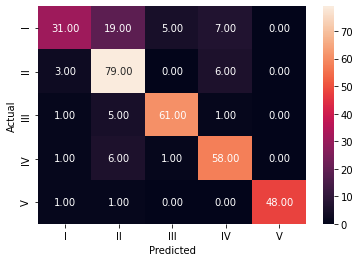

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        62
           1       0.72      0.90      0.80        88
           2       0.91      0.90      0.90        68
           3       0.81      0.88      0.84        66
           4       1.00      0.96      0.98        50

    accuracy                           0.83       334
   macro avg       0.85      0.83      0.83       334
weighted avg       0.84      0.83      0.82       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


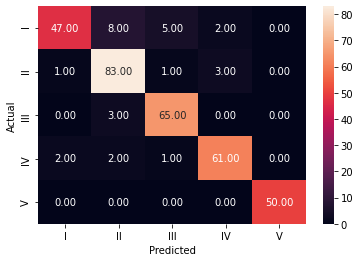

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        62
           1       0.86      0.94      0.90        88
           2       0.90      0.96      0.93        68
           3       0.92      0.92      0.92        66
           4       1.00      1.00      1.00        50

    accuracy                           0.92       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.92      0.92      0.91       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


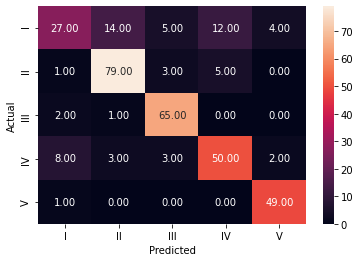

              precision    recall  f1-score   support

           0       0.69      0.44      0.53        62
           1       0.81      0.90      0.85        88
           2       0.86      0.96      0.90        68
           3       0.75      0.76      0.75        66
           4       0.89      0.98      0.93        50

    accuracy                           0.81       334
   macro avg       0.80      0.81      0.80       334
weighted avg       0.80      0.81      0.80       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

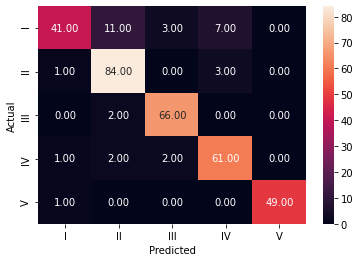

              precision    recall  f1-score   support

           0       0.93      0.66      0.77        62
           1       0.85      0.95      0.90        88
           2       0.93      0.97      0.95        68
           3       0.86      0.92      0.89        66
           4       1.00      0.98      0.99        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.91      0.90      0.90       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


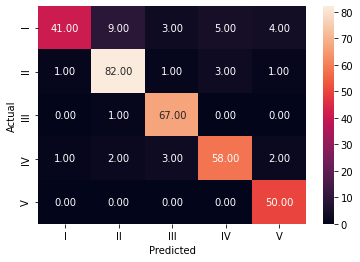

              precision    recall  f1-score   support

           0       0.95      0.66      0.78        62
           1       0.87      0.93      0.90        88
           2       0.91      0.99      0.94        68
           3       0.88      0.88      0.88        66
           4       0.88      1.00      0.93        50

    accuracy                           0.89       334
   macro avg       0.90      0.89      0.89       334
weighted avg       0.90      0.89      0.89       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


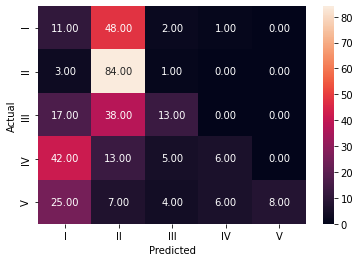

              precision    recall  f1-score   support

           0       0.11      0.18      0.14        62
           1       0.44      0.95      0.60        88
           2       0.52      0.19      0.28        68
           3       0.46      0.09      0.15        66
           4       1.00      0.16      0.28        50

    accuracy                           0.37       334
   macro avg       0.51      0.31      0.29       334
weighted avg       0.48      0.37      0.31       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

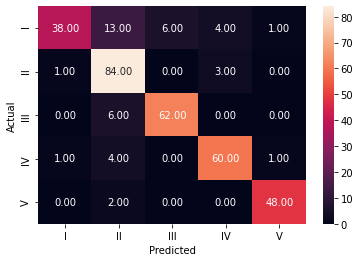

              precision    recall  f1-score   support

           0       0.95      0.61      0.75        62
           1       0.77      0.95      0.85        88
           2       0.91      0.91      0.91        68
           3       0.90      0.91      0.90        66
           4       0.96      0.96      0.96        50

    accuracy                           0.87       334
   macro avg       0.90      0.87      0.87       334
weighted avg       0.89      0.87      0.87       334

***************************************************************************


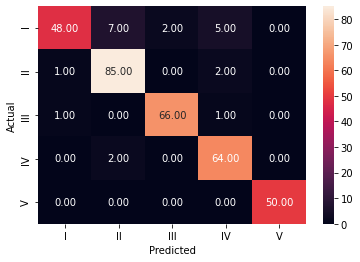

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        62
           1       0.90      0.97      0.93        88
           2       0.97      0.97      0.97        68
           3       0.89      0.97      0.93        66
           4       1.00      1.00      1.00        50

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

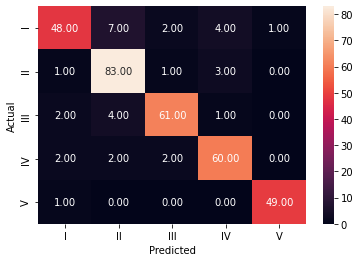

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        62
           1       0.86      0.94      0.90        88
           2       0.92      0.90      0.91        68
           3       0.88      0.91      0.90        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.90      0.90      0.90       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.992504  ...  0.907444             0.296740
2         KNeighborsClassifier        0.929535  ...  0.823234             2.667831
3                          SVC        0.973013  ...  0.914880             0.188810
4       DecisionTreeClassifier        0.997751  ...  0.796362             6.420043
5       RandomForestClassifier        0.996252  ...  0.897800             0.416673
6            BaggingClassifier        0.997751  ...  0.888065             0.348983
7           AdaBoostClassifier        0.392804  ...  0.312976             1.371615
8   GradientBoostingClassifier        0.925787  ...  0.870631             0.583398
9           CatBoostClassifier        0.991754  ...  0.935803             0.270573
10               XGBClassifier        0.964018  ...  0.900349             0.408407

[10 rows x 7 columns]

In [84]:
X=x_ML_cv_2.drop(['Accident_Level'],axis=1)
Y=x_ML_cv_2.Accident_Level
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

3. Trigrams

(1334, 500)
(334, 500)
(1334,)
(334,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***************************************************************************


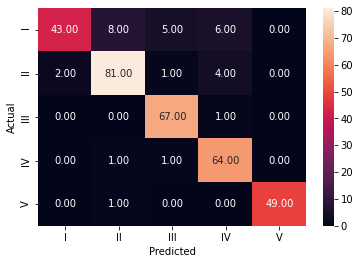

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        62
           1       0.89      0.92      0.91        88
           2       0.91      0.99      0.94        68
           3       0.85      0.97      0.91        66
           4       1.00      0.98      0.99        50

    accuracy                           0.91       334
   macro avg       0.92      0.91      0.91       334
weighted avg       0.91      0.91      0.91       334

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
***************************************************************************


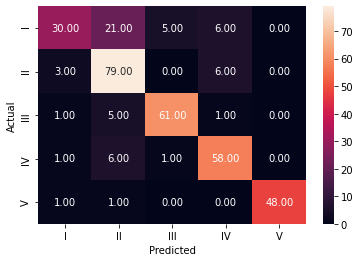

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        62
           1       0.71      0.90      0.79        88
           2       0.91      0.90      0.90        68
           3       0.82      0.88      0.85        66
           4       1.00      0.96      0.98        50

    accuracy                           0.83       334
   macro avg       0.85      0.82      0.83       334
weighted avg       0.84      0.83      0.82       334

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
***************************************************************************


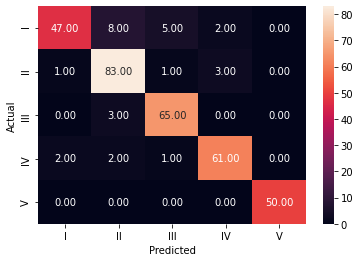

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        62
           1       0.86      0.94      0.90        88
           2       0.90      0.96      0.93        68
           3       0.92      0.92      0.92        66
           4       1.00      1.00      1.00        50

    accuracy                           0.92       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.92      0.92      0.91       334

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
***************************************************************************


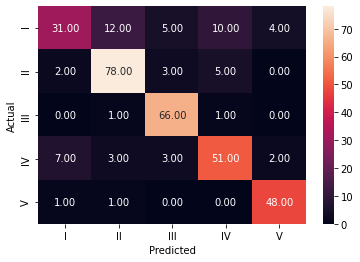

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        62
           1       0.82      0.89      0.85        88
           2       0.86      0.97      0.91        68
           3       0.76      0.77      0.77        66
           4       0.89      0.96      0.92        50

    accuracy                           0.82       334
   macro avg       0.82      0.82      0.81       334
weighted avg       0.81      0.82      0.81       334

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
         

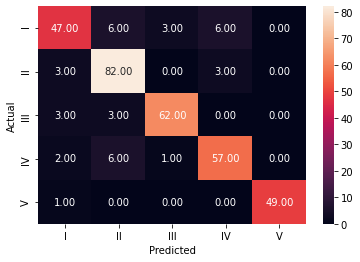

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        62
           1       0.85      0.93      0.89        88
           2       0.94      0.91      0.93        68
           3       0.86      0.86      0.86        66
           4       1.00      0.98      0.99        50

    accuracy                           0.89       334
   macro avg       0.90      0.89      0.89       334
weighted avg       0.89      0.89      0.89       334

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=30,
                  n_jobs=None, oob_score=True, random_state=1, verbose=0,
                  warm_start=False)
***************************************************************************


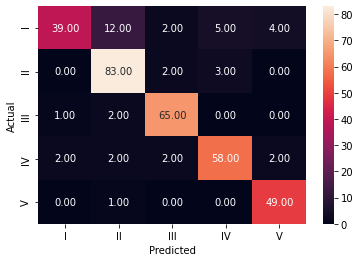

              precision    recall  f1-score   support

           0       0.93      0.63      0.75        62
           1       0.83      0.94      0.88        88
           2       0.92      0.96      0.94        68
           3       0.88      0.88      0.88        66
           4       0.89      0.98      0.93        50

    accuracy                           0.88       334
   macro avg       0.89      0.88      0.88       334
weighted avg       0.88      0.88      0.88       334

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=1)
***************************************************************************


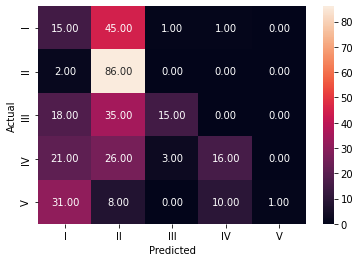

              precision    recall  f1-score   support

           0       0.17      0.24      0.20        62
           1       0.43      0.98      0.60        88
           2       0.79      0.22      0.34        68
           3       0.59      0.24      0.34        66
           4       1.00      0.02      0.04        50

    accuracy                           0.40       334
   macro avg       0.60      0.34      0.31       334
weighted avg       0.57      0.40      0.34       334

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecate

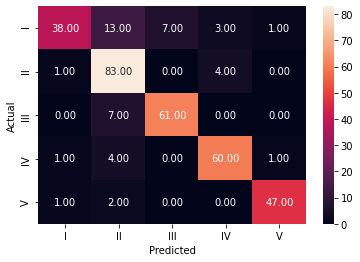

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        62
           1       0.76      0.94      0.84        88
           2       0.90      0.90      0.90        68
           3       0.90      0.91      0.90        66
           4       0.96      0.94      0.95        50

    accuracy                           0.87       334
   macro avg       0.89      0.86      0.87       334
weighted avg       0.88      0.87      0.86       334

***************************************************************************


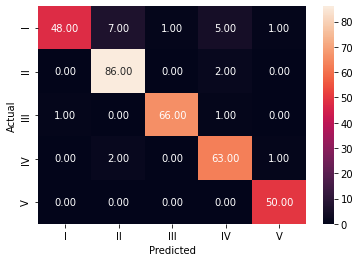

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        62
           1       0.91      0.98      0.94        88
           2       0.99      0.97      0.98        68
           3       0.89      0.95      0.92        66
           4       0.96      1.00      0.98        50

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
***************************************

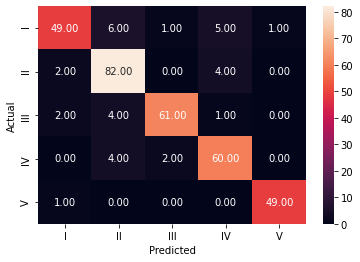

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        62
           1       0.85      0.93      0.89        88
           2       0.95      0.90      0.92        68
           3       0.86      0.91      0.88        66
           4       0.98      0.98      0.98        50

    accuracy                           0.90       334
   macro avg       0.91      0.90      0.90       334
weighted avg       0.90      0.90      0.90       334



Method  Train Accuracy  ...  F1-Score  Multi-Class Logloss
1           LogisticRegression        0.992504  ...  0.907345             0.297871
2         KNeighborsClassifier        0.930285  ...  0.819742             2.767951
3                          SVC        0.973013  ...  0.914880             0.186113
4       DecisionTreeClassifier        0.997751  ...  0.811409             6.006405
5       RandomForestClassifier        0.997001  ...  0.888686             0.444817
6            BaggingClassifier        0.995502  ...  0.875646             0.358437
7           AdaBoostClassifier        0.416792  ...  0.338795             1.384733
8   GradientBoostingClassifier        0.919790  ...  0.862046             0.593373
9           CatBoostClassifier        0.991754  ...  0.935752             0.275429
10               XGBClassifier        0.961769  ...  0.900892             0.407580

[10 rows x 7 columns]

In [85]:
X=x_ML_cv_3.drop(['Accident_Level'],axis=1)
Y=x_ML_cv_3.Accident_Level
X_train, X_test, y_train, y_test = train_test_split(X,  Y, test_size = 0.20, random_state = 1, stratify = y_ML)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

There is not much of a difference between the results of count vectorized data and tf idf vectorized data. In both cases, SVC performs the best followed by the catboost classifier.
One more observation is that the data performs the best using tf idf vectorizer (bi-grams) with a training accuracy of 99% and a test accuracy of 96.1%. The precision, recall and F1 scores are also very good approx 96.1%, making it the best performed model. 

We will now work on the deep learning data. Will pass the deep learning data to the below models:

1. LSTM
2. Bi-directional LSTM
3. GRU
4. Transformer Model

1. LSTM

We will embed our deep learning data using Glove embeddings

In [86]:
my_corpus = []
for text in accident_safety_data_upsampled['Description_DL']:
    words = [word.lower() for word in word_tokenize(text)] 
    my_corpus.append(words)
num_words = len(my_corpus)
print(num_words)

1668


In [87]:
accident_safety_data_upsampled.head()

Accident_Level  ...                                     Description_ML
0             II  ...  patch line right wing angl bracket predomin at...
1             II  ...  posit good order bracket loom atom number brin...
2             II  ...  spell line right wing squar bracket loom nitro...
3             II  ...  align right bracket tower opposit releas tensi...
4             II  ...  align beat respect right bracket tower releas ...

[5 rows x 4 columns]

In [88]:
X = accident_safety_data_upsampled['Description_DL']
Y = accident_safety_data_upsampled['Accident_Level']

In [89]:
#Labelling the column Accident_Level
Y = LabelEncoder().fit_transform(Y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1, stratify = Y)
print('X_text_train shape : ({0})'.format(X_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_test.shape[0]))

X_text_train shape : (1334)
y_text_train shape : (1334,)
X_text_test shape : (334)
y_text_test shape : (334,)


Since we will be passing this data to a deep learning model, we will have to one hot encode the Y variable.

In [91]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Step 1 : convert the words into thier corresponding numeric indexes.

In [92]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Step 2: Since the length of the sentences returned by the tokenizer are of varying lengths, we will need to pad the sequences

In [93]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

vocab_size: 5502


In [94]:
max_length = 32
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [95]:
#Let us now create our test and validation set as 50 50
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=2)

Let us make a weight matrix of all words in corpus using pre-trained glove embeddings

In [96]:
import numpy as np

embedding = {}
with open("/content/drive/MyDrive/Colab Notebooks/NLP/CapstoneProjectNLP/data/glove.6B.200d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

In [97]:
embedding_size = 200
embeddings_dictionary = dict()

embedding_matrix = np.zeros((vocab_size, embedding_size))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

In [98]:
print(len(embedding.values()))
print(embedding_matrix.shape)

400000
(5502, 200)


In [99]:
# Build a Bi-directional LSTM Neural Network
deep_inputs = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [100]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 32, 200)           1100400   
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 256)           336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [102]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

In [103]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_val, Y_val), callbacks=[rlrp, metrics])

Epoch 1/100
167/167 [==============================] - 27s 16ms/step - loss: 1.6908 - acc: 0.1909 - val_loss: 1.6019 - val_acc: 0.2455
Epoch 2/100
 21/167 [==>...........................] - ETA: 1s - loss: 1.6044 - acc: 0.2490

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



167/167 [==============================] - 1s 8ms/step - loss: 1.6120 - acc: 0.2378 - val_loss: 1.5987 - val_acc: 0.2455
Epoch 3/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5945 - acc: 0.2684 - val_loss: 1.5974 - val_acc: 0.2455
Epoch 4/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5951 - acc: 0.2564 - val_loss: 1.5967 - val_acc: 0.2455
Epoch 5/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5981 - acc: 0.2651 - val_loss: 1.5969 - val_acc: 0.2455
Epoch 6/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5943 - acc: 0.2536 - val_loss: 1.5970 - val_acc: 0.2455
Epoch 7/100
167/167 [==============================] - 1s 8ms/step - loss: 1.6004 - acc: 0.2521 - val_loss: 1.5971 - val_acc: 0.2455
Epoch 8/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5976 - acc: 0.2543 - val_loss: 1.5975 - val_acc: 0.2455
Epoch 9/100
167/167 [==============================] - 1s 8ms/step - loss: 1.5923

In [108]:
# evaluate the keras model
train_accuracy = model.evaluate(X_train, y_train, batch_size=8, verbose=0)
test_accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print(train_accuracy,test_accuracy)

[1.5923235416412354, 0.2638680636882782] [1.5886247158050537, 0.28143712878227234]


Text(0.5, 1.0, 'Training and validation loss')

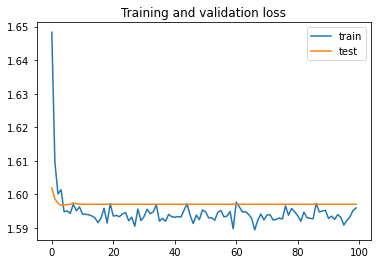

In [113]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')